In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

2025-04-27 17:22:23.095444: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-27 17:22:23.114099: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745754743.135583    9905 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745754743.141991    9905 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745754743.157135    9905 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
df = pd.read_csv("IMDB Dataset.csv", encoding = 'latin1')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
texts = df['review'].values
labels = df['sentiment'].values

In [4]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [5]:
vocab_size = 10000
max_length = 200
oov_token = "<OOV>"

In [6]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_token)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen = max_length, padding = 'post', truncating = 'post')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size = 0.2, random_state = 42)

In [8]:
model = Sequential([
    Embedding(input_dim = vocab_size, output_dim = 16, input_length = max_length),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1,activation = 'sigmoid')
])


/home/nik/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [9]:
model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

2025-04-27 17:22:46.725482: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    X_train, y_train,
    epochs = 10,
    validation_data = (X_test, y_test),
    batch_size = 32
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6784 - loss: 0.5866 - val_accuracy: 0.8553 - val_loss: 0.3319
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8800 - loss: 0.2972 - val_accuracy: 0.8776 - val_loss: 0.2933
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9014 - loss: 0.2525 - val_accuracy: 0.8764 - val_loss: 0.2950
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9093 - loss: 0.2250 - val_accuracy: 0.8710 - val_loss: 0.3063
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9216 - loss: 0.2065 - val_accuracy: 0.8787 - val_loss: 0.3011
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9267 - loss: 0.1911 - val_accuracy: 0.8662 - val_loss: 0.3280
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9313 - loss: 0.1815 - val_accuracy: 0.8733 - val_loss: 0.3255
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9347 - loss: 0.1735 

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy :{accuracy * 100}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8656 - loss: 0.3602
Test Accuracy :86.69000267982483%


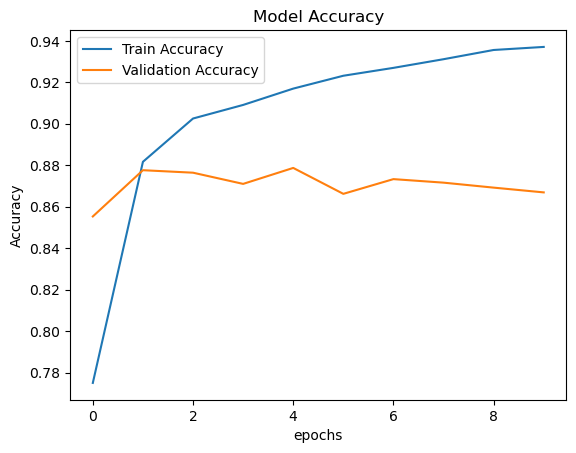

In [12]:
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

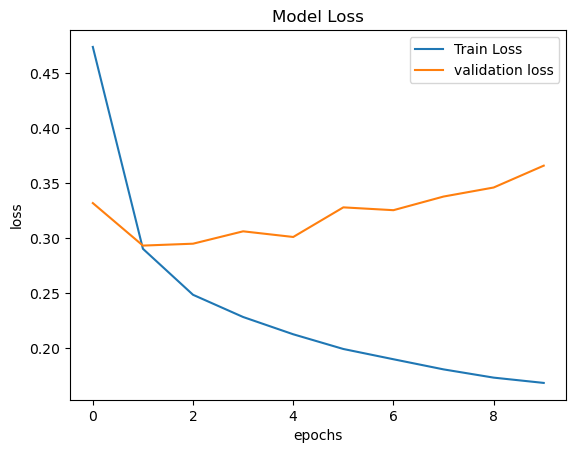

In [13]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [14]:
def predict_review(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen = max_length, padding = 'post', truncating = 'post')
    pred = model.predict(padded)[0][0]
    sentiment = "positive" if pred > 0.5 else 'negative'
    print(f"Review: {text}")
    print(f"predicted : {sentiment} ({pred})")

predict_review("This Movie is really amazing.")
predict_review("The movie is bad")
predict_review("This movie was terrible. Waste of time.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Review: This Movie is really amazing.
predicted : positive (0.550796389579773)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Review: The movie is bad
predicted : negative (0.129221111536026)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Review: This movie was terrible. Waste of time.
predicted : negative (0.0059310500510036945)
